In [63]:
import yfinance as yf
import pandas as pd
import os

In [83]:
stock= "AAPL"
start_date="2021-01-01"
end_date="2024-10-15"
data= yf.download(stock,start=start_date,end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.683434   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.249725   
2021-01-06  127.720001  131.050003  126.379997  126.599998  123.932632   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.161606   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.267807   
...                ...         ...         ...         ...         ...   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
2024-10-11  229.300003  229.410004  227.339996  227.550003  227.550003   
2024-10-14  228.699997  231.729996  228.600006  231.300003  231.300003   

               Volume  
Date         

In [84]:
df=pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.683434,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.249725,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.932632,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.161606,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.267807,105158200


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 951 entries, 2021-01-04 to 2024-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       951 non-null    float64
 1   High       951 non-null    float64
 2   Low        951 non-null    float64
 3   Close      951 non-null    float64
 4   Adj Close  951 non-null    float64
 5   Volume     951 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 52.0 KB


In [86]:
df["date"]=pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,126.683434,143301900,2021-01-04
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.249725,97664900,2021-01-05
2021-01-06,127.720001,131.050003,126.379997,126.599998,123.932632,155088000,2021-01-06
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.161606,109578200,2021-01-07
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.267807,105158200,2021-01-08


In [87]:
import plotly.graph_objects as go


In [88]:
pip install plotly


C:\Users\mabas\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



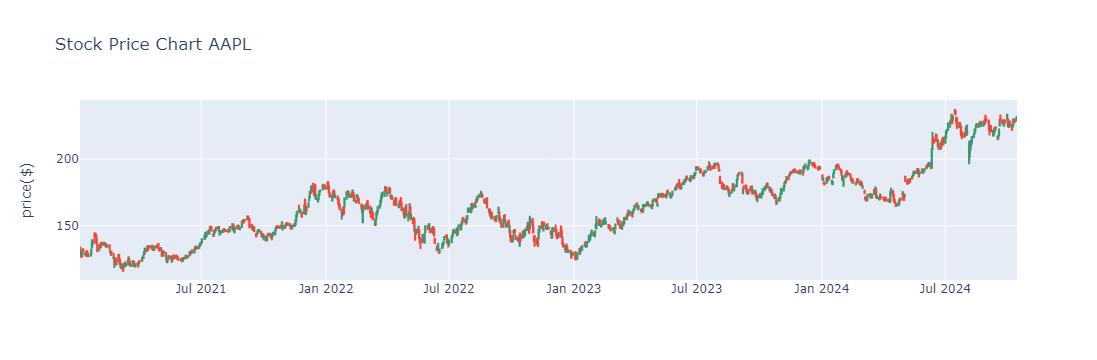

In [89]:
#USING PLOTLY ,CREATING A CANDLESTICK PATTERN OF STOCK PRICE CHART:

fig= go.Figure(data=[go.Candlestick(x=df['date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
fig.update_layout(
    title="Stock Price Chart AAPL",
    yaxis_title="price($)",
    xaxis_rangeslider_visible=False)
fig.show()

<Axes: >

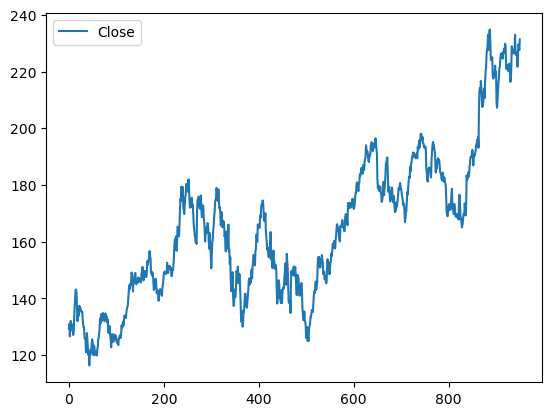

In [90]:
df.drop(['date','Volume'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.plot.line(y="Close",use_index=True)


In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [92]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING SETS:

x=df[['Open','Close','High','Low','Adj Close']]
y=df['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [93]:
#BUILDING A RANDOM FOREST REGRESSION MODEL:
rf= RandomForestRegressor(n_estimators=100,random_state=42)

#TRAINING THE MODEL:
rf.fit(x_train,y_train)

#PREDICTION ON TESTING SET:
y_pred=rf.predict(x_test)

In [94]:
#EVALUATING THE MODEL USING MEAN SQUARE ERROR:
mse=mean_squared_error(y_test,y_pred)
print("Mean Square Error is:",mse)

Mean Square Error is: 0.043583180022628655


In [98]:
df["Close"].tail()

946    225.770004
947    229.539993
948    229.039993
949    227.550003
950    231.300003
Name: Close, dtype: float64

In [97]:
#INPUT THE LAST FIVE VALUES TO PREDICT THE STOCK PRICE:
import numpy as np
new_data= np.array([[224.300003,225.229996,227.779999,229.300003,228.699997]])
predicted_price=rf.predict(new_data)
print("predicted stock opening price:",predicted_price)

predicted stock opening price: [227.1179985]


C:\Users\mabas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [99]:
new_data2= np.array([[225.770004,229.539993,229.039993,227.550003,231.300003]])
predicted_price=rf.predict(new_data2)
print("predicted stock closing price:",predicted_price[0])

predicted stock closing price: 229.75839599609375


C:\Users\mabas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

